# Simple Probabilistic Programming

In [64]:
from __future__ import division

import random
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

In [23]:
# First calculate the probability of a Natural in Blackjack
Suite = lambda card: int(card / 13)
Face = lambda card: card % 13
FaceCard = lambda card: (Face(card) in [8, 9, 10, 11])
Ace = lambda card: (Face(card) == 12)

class Deck(object):
    def __init__(self):
        self.pos = 0
        self.cards=range(52)
        random.shuffle(self.cards)
    def Deal2(self):
        if self.pos<50:
            self.pos = self.pos+2
            return d.cards[d.pos-2], d.cards[d.pos-1]
        else:
            random.shuffle(self.cards)
            self.pos = 2 
            return self.cards[0], self.cards[1]

def BlackJack(c1, c2):
    if (Ace(c1) and FaceCard(c2)) or (Ace(c2) and FaceCard(c1)):
        return True
    return False

d = Deck()

0.0488 0.00441856


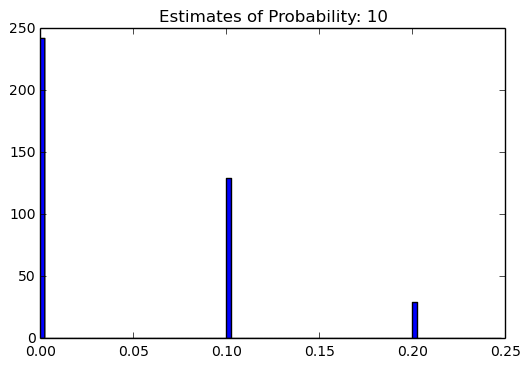

In [63]:
SampleSize= 10
Tests = 1000
p_estimates =  [sum([BlackJack(*d.Deal2()) for _ in range(SampleSize)])/SampleSize for _ in range(Tests)]
abbins = [i/400.0 for i in range(100)]  # 100 bins between 0 and 0.25

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(SampleSize));
print np.average(p_estimates), np.var(p_estimates)

0.04916 0.0003112944


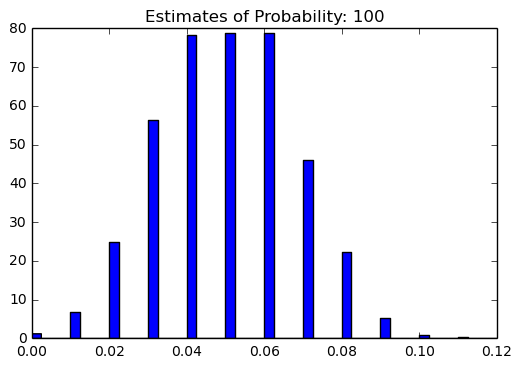

In [61]:
SampleSize= 100
Tests = 1000
p_estimates =  [sum([BlackJack(*d.Deal2()) for _ in range(SampleSize)])/SampleSize for _ in range(Tests)]
abbins = [i/400.0 for i in range(100)]  # 100 bins between 0 and 0.25

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(SampleSize));
print np.average(p_estimates), np.var(p_estimates)

0.048304 2.9455584e-05


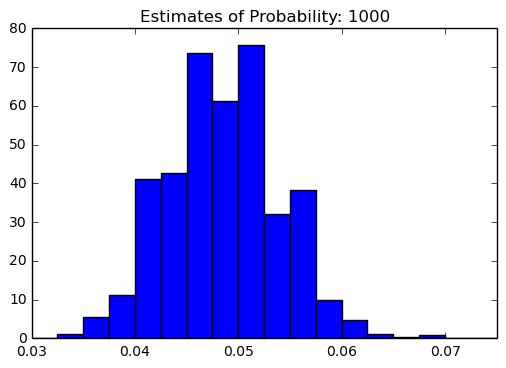

In [60]:
SampleSize= 1000
Tests = 1000
p_estimates =  [sum([BlackJack(*d.Deal2()) for _ in range(SampleSize)])/SampleSize for _ in range(Tests)]
abbins = [i/400.0 for i in range(100)]  # 100 bins between 0 and 0.25

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(SampleSize));
print np.average(p_estimates), np.var(p_estimates)

0.0483078 3.39049916e-06


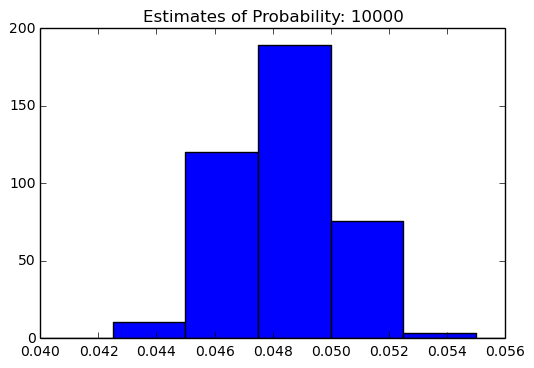

In [59]:
SampleSize= 10000
Tests = 1000
p_estimates =  [sum([BlackJack(*d.Deal2()) for _ in range(SampleSize)])/SampleSize for _ in range(Tests)]
abbins = [i/400.0 for i in range(100)]  # 100 bins between 0 and 0.25

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(SampleSize));
print np.average(p_estimates), np.var(p_estimates)

In [118]:
def GetIndexProb(p, l):
    cProb = 0
    for i in range(len(l)):
        cProb = cProb + l[i]
        if cProb >= p:
            return i
        
df = pd.read_csv('student.csv', delimiter=',', header=0)
print df
df = df.as_matrix()
studentProbs = df[:,3]

def GetSample(sampleSize, probs):
    i1d1 = 0
    g2i1d1 = 0
    for _ in range(sampleSize):
        i = GetIndexProb(random.random(), studentProbs)
        iT1 = (df[i][0], df[i][1])
        iT2 = (df[i][0], df[i][1], df[i][2])
        if (iT1 == ('I1','d1')):
            i1d1 = i1d1 + 1
        if (iT2 == ('I1','d1', 'g2')):
            g2i1d1 = g2i1d1 + 1
    return g2i1d1/i1d1

   Intelligence (I) Difficulty (D) Grade (G)  P(I, D, G)
0                I0             d0        g1      0.1260
1                I0             d0        g2      0.1680
2                I0             d0        g3      0.1260
3                I0             d1        g1      0.0090
4                I0             d1        g2      0.0450
5                I0             d1        g3      0.1260
6                I1             d0        g1      0.2520
7                I1             d0        g2      0.0224
8                I1             d0        g3      0.0056
9                I1             d1        g1      0.0600
10               I1             d1        g2      0.0360
11               I1             d1        g3      0.0240


0.296211527718 0.0182295479333


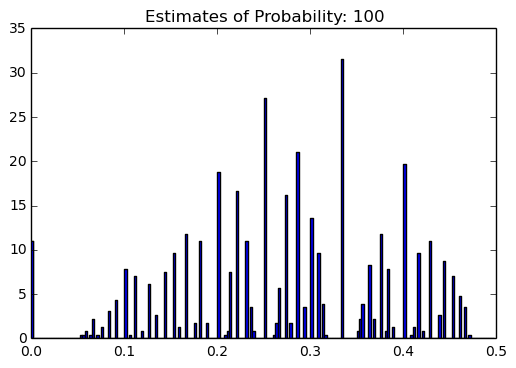

In [119]:
sampleSize = 100
tests = 100
p_estimates =  [GetSample(sampleSize, studentProbs) for _ in range(Tests)]
abbins = [i/400.0 for i in range(200)]  # 100 bins between 0 and 0.5

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(sampleSize));
print np.average(p_estimates), np.var(p_estimates)

0.299332545445 0.00172491701771


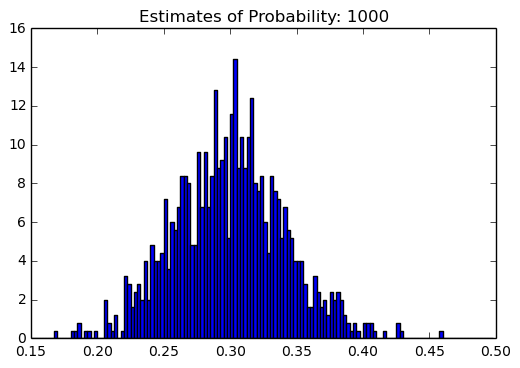

In [116]:
sampleSize = 1000
tests = 100
p_estimates =  [GetSample(sampleSize, studentProbs) for _ in range(Tests)]
abbins = [i/400.0 for i in range(200)]  # 100 bins between 0 and 0.5

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(sampleSize));
print np.average(p_estimates), np.var(p_estimates)

0.300248859452 0.000179531050882


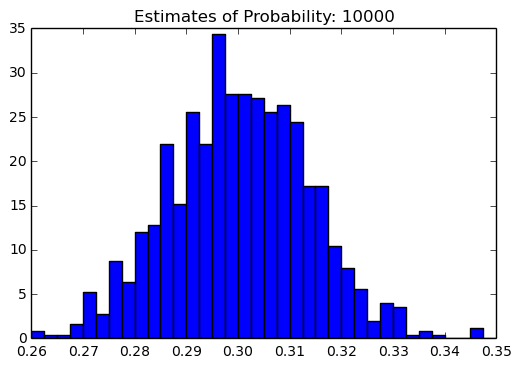

In [117]:
sampleSize = 10000
tests = 100
p_estimates =  [GetSample(sampleSize, studentProbs) for _ in range(Tests)]
abbins = [i/400.0 for i in range(200)]  # 100 bins between 0 and 0.5

plt.hist(p_estimates, bins=abbins, normed=True)
plt.title('Estimates of Probability: ' + str(sampleSize));
print np.average(p_estimates), np.var(p_estimates)